In [1]:
from hiive.mdptoolbox import mdp, example
import hiive
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map
import json
import numpy as np


**Value Iteration**

In [71]:
def value_iteration(state_size=10, gamma=0.9, epsilon=0.01, plot=False):
    iterations = []
    times  = []
    rewards = []

    for _ in range(10):
        P, R = example.forest(S=state_size)

        vi = mdp.ValueIteration(P, R, gamma=gamma, epsilon = epsilon)
        stats = vi.run()
        iterations.append(vi.iter)
        times.append(vi.time)
        reward = [stat['Reward'] for stat in stats]
        rewards.append(reward)

    results = [sum(iterations)/len(iterations), max(iterations), min(iterations), 
               round(sum(times)/len(times), 4), round(max(times), 4), round(min(times), 4)]
#     print('mean iteration: ', sum(iterations)/len(iterations))
#     print('max iteration: ', max(iterations))
#     print('min iteration: ', min(iterations))

#     print('mean time: ', round(sum(times)/len(times), 4))
#     print('max time: ', round(max(times), 4))
#     print('min time: ', round(min(times), 4))

    if not plot:
        return results
    
    mean_list = []
    max_list = []
    min_list = []
    for i in range(100):

        acc = 0
        count = 0
        max_r = 0
        min_r = 10
        for r in rewards:

            if i < len(r):
                acc += r[i]
                count += 1
                if r[i] > max_r:
                    max_r = r[i]
                if r[i] < min_r:
                    min_r = r[i]
        if count == 0: continue
        mean_list.append(acc/count)
        max_list.append(max_r)
        min_list.append(min_r)

#     plt.figure()
    plt.plot(range(1, len(mean_list)+1), mean_list, 
             label=f"size {state_size}"
#             label=f"gamma={gamma}"
#             label=f"epsilon={epsilon}"
            )
    plt.fill_between(range(1, len(mean_list)+1), min_list, max_list, alpha=0.2)

    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Reward")
    plt.title("Rewards vs Iterations in Value Iteration (Forest)")
    
    return results

Text(0.5, 1.0, 'Time vs Discount rate in Value Iteration (Forest)')

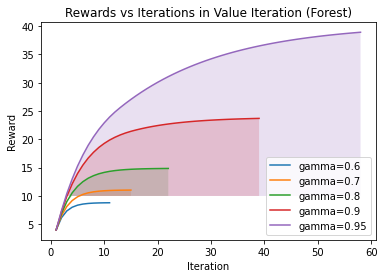

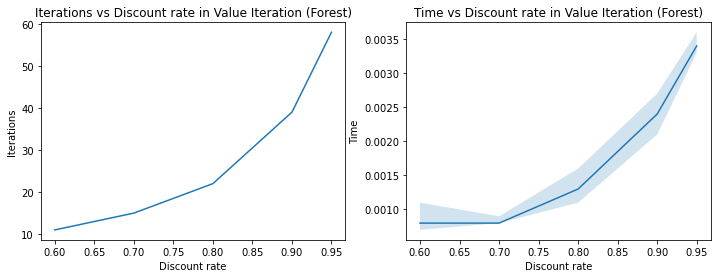

In [68]:
# Discount rate
mean_iteration = []
max_iteration = []
min_iteration = []
mean_time = []
max_time = []
min_time = []

gammas=[0.6, 0.7, 0.8, 0.9, 0.95]
for g in gammas:
    a, b, c, e, f, g = value_iteration(gamma=g, plot=True)
    mean_iteration.append(a)
    max_iteration.append(b)
    min_iteration.append(c)
    mean_time.append(e)
    max_time.append(f)
    min_time.append(g)

plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121)
ax1.plot(gammas, mean_iteration)
ax1.fill_between(gammas, min_iteration, max_iteration, alpha=0.2)
ax1.set_xlabel("Discount rate")
ax1.set_ylabel("Iterations")
plt.title("Iterations vs Discount rate in Value Iteration (Forest)")

ax2 = plt.subplot(122)
ax2.plot(gammas, mean_time)
ax2.fill_between(gammas, min_time, max_time, alpha=0.2)
ax2.set_xlabel("Discount rate")
ax2.set_ylabel("Time")
plt.title("Time vs Discount rate in Value Iteration (Forest)")

Text(0.5, 1.0, 'Time vs epsilon in Value Iteration (Forest)')

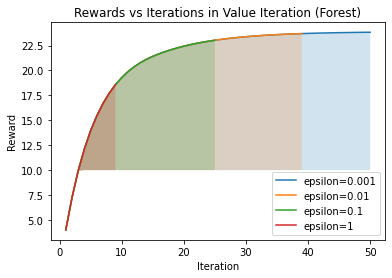

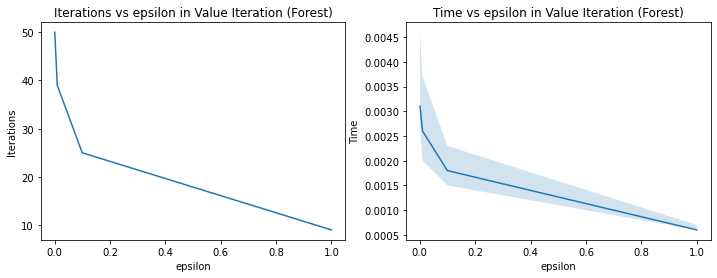

In [70]:
# epsilon
mean_iteration = []
max_iteration = []
min_iteration = []
mean_time = []
max_time = []
min_time = []

epsilon=[0.001, 0.01, 0.1, 1]
for e in epsilon:
    a, b, c, e, f, g = value_iteration(epsilon=e, plot=True)
    mean_iteration.append(a)
    max_iteration.append(b)
    min_iteration.append(c)
    mean_time.append(e)
    max_time.append(f)
    min_time.append(g)

plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121)
ax1.plot(epsilon, mean_iteration)
ax1.fill_between(epsilon, min_iteration, max_iteration, alpha=0.2)
ax1.set_xlabel("epsilon")
ax1.set_ylabel("Iterations")
plt.title("Iterations vs epsilon in Value Iteration (Forest)")

ax2 = plt.subplot(122)
ax2.plot(epsilon, mean_time)
ax2.fill_between(epsilon, min_time, max_time, alpha=0.2)
ax2.set_xlabel("epsilon")
ax2.set_ylabel("Time")
plt.title("Time vs epsilon in Value Iteration (Forest)")

/var/folders/5n/kd6vhj9s3n75jbqglr3_0jx80000gn/T/ipykernel_66193/1407952319.py:23: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_xticks(size, [f'{s}x{s}' for s in size])
/var/folders/5n/kd6vhj9s3n75jbqglr3_0jx80000gn/T/ipykernel_66193/1407952319.py:31: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax2.set_xticks(size, [f'{s}x{s}' for s in size])


Text(0.5, 1.0, 'Time vs State Size in Value Iteration (Forest)')

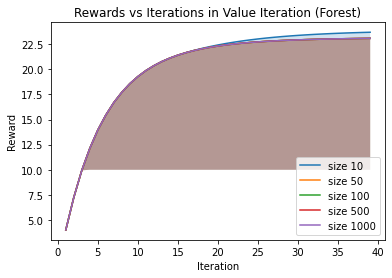

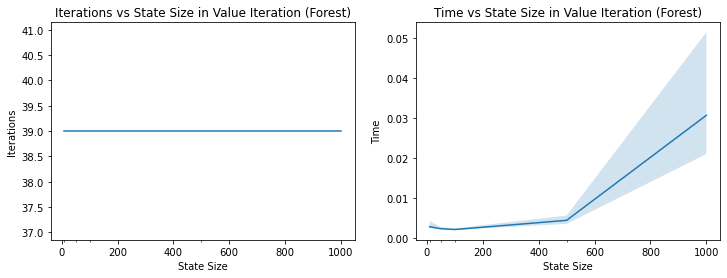

In [85]:
# state size
mean_iteration = []
max_iteration = []
min_iteration = []
mean_time = []
max_time = []
min_time = []

size=[10, 50, 100, 500, 1000]
for s in size:
    a, b, c, e, f, g = value_iteration(state_size=s, plot=True)
    mean_iteration.append(a)
    max_iteration.append(b)
    min_iteration.append(c)
    mean_time.append(e)
    max_time.append(f)
    min_time.append(g)

plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121)
ax1.plot(size, mean_iteration)
ax1.fill_between(size, min_iteration, max_iteration, alpha=0.2)
ax1.set_xticks(size, [f'{s}x{s}' for s in size])
ax1.set_xlabel("State Size")
ax1.set_ylabel("Iterations")
plt.title("Iterations vs State Size in Value Iteration (Forest)")

ax2 = plt.subplot(122)
ax2.plot(size, mean_time)
ax2.fill_between(size, min_time, max_time, alpha=0.2)
ax2.set_xticks(size, [f'{s}x{s}' for s in size])
ax2.set_xlabel("State Size")
ax2.set_ylabel("Time")
plt.title("Time vs State Size in Value Iteration (Forest)")

**Policy Iteration**

In [80]:
def policy_iteration(state_size=10, gamma=0.9, plot=False):
    iterations = []
    times  = []
    rewards = []

    for _ in range(10):
        P, R = example.forest(S=state_size)

        vi = mdp.PolicyIteration(P, R, gamma=gamma, max_iter=20)
        stats = vi.run()
        iterations.append(vi.iter)
        times.append(vi.time)
        reward = [stat['Reward'] for stat in stats]
        rewards.append(reward)

    results = [sum(iterations)/len(iterations), max(iterations), min(iterations), 
               round(sum(times)/len(times), 4), round(max(times), 4), round(min(times), 4)]
#     print('mean iteration: ', sum(iterations)/len(iterations))
#     print('max iteration: ', max(iterations))
#     print('min iteration: ', min(iterations))

#     print('mean time: ', round(sum(times)/len(times), 4))
#     print('max time: ', round(max(times), 4))
#     print('min time: ', round(min(times), 4))

    if not plot:
        return results
    
    mean_list = []
    max_list = []
    min_list = []
    for i in range(100):

        acc = 0
        count = 0
        max_r = 0
        min_r = 10
        for r in rewards:

            if i < len(r):
                acc += r[i]
                count += 1
                if r[i] > max_r:
                    max_r = r[i]
                if r[i] < min_r:
                    min_r = r[i]
        if count == 0: continue
        mean_list.append(acc/count)
        max_list.append(max_r)
        min_list.append(min_r)

#     plt.figure()
    plt.plot(range(1, len(mean_list)+1), mean_list, 
             label=f"size {state_size}"
#             label=f"gamma={gamma}"
            )
    plt.fill_between(range(1, len(mean_list)+1), min_list, max_list, alpha=0.2)
#     plt.ylim(0,1)
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Reward")
    plt.title("Rewards vs Iterations in Policy Iteration (Forest)")
    
    return results

# policy_iteration(plot=True)

0.6
0.7
0.8
0.9
0.95


Text(0.5, 1.0, 'Time vs Discount rate in Policy Iteration (Forest)')

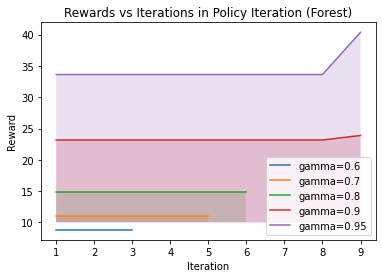

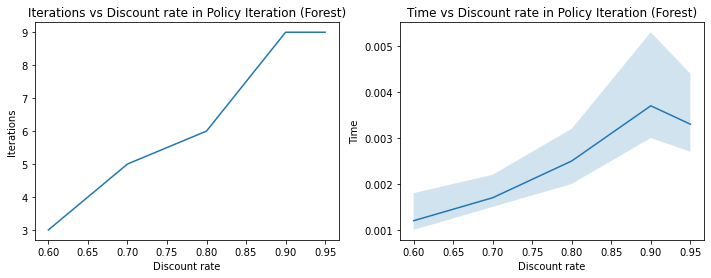

In [79]:
# Discount rate
mean_iteration = []
max_iteration = []
min_iteration = []
mean_time = []
max_time = []
min_time = []

gammas=[0.6, 0.7, 0.8, 0.9, 0.95]
for g in gammas:
    print(g)
    a, b, c, e, f, g = policy_iteration(gamma=g, plot=True)
    mean_iteration.append(a)
    max_iteration.append(b)
    min_iteration.append(c)
    mean_time.append(e)
    max_time.append(f)
    min_time.append(g)

plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121)
ax1.plot(gammas, mean_iteration)
ax1.fill_between(gammas, min_iteration, max_iteration, alpha=0.2)
ax1.set_xlabel("Discount rate")
ax1.set_ylabel("Iterations")
plt.title("Iterations vs Discount rate in Policy Iteration (Forest)")

ax2 = plt.subplot(122)
ax2.plot(gammas, mean_time)
ax2.fill_between(gammas, min_time, max_time, alpha=0.2)
ax2.set_xlabel("Discount rate")
ax2.set_ylabel("Time")
plt.title("Time vs Discount rate in Policy Iteration (Forest)")

/var/folders/5n/kd6vhj9s3n75jbqglr3_0jx80000gn/T/ipykernel_66193/2218073349.py:23: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_xticks(size, [f'{s}x{s}' for s in size])
/var/folders/5n/kd6vhj9s3n75jbqglr3_0jx80000gn/T/ipykernel_66193/2218073349.py:31: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax2.set_xticks(size, [f'{s}x{s}' for s in size])


Text(0.5, 1.0, 'Time vs State Size in Policy Iteration (Forest)')

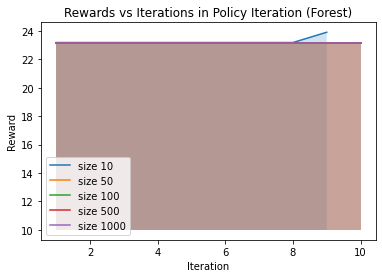

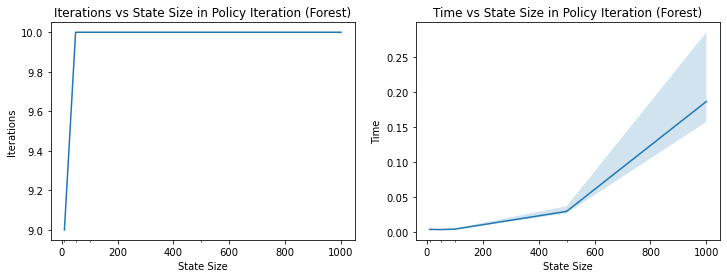

In [86]:
# state size
mean_iteration = []
max_iteration = []
min_iteration = []
mean_time = []
max_time = []
min_time = []

size=[10, 50, 100, 500, 1000]
for s in size:
    a, b, c, e, f, g = policy_iteration(state_size=s, plot=True)
    mean_iteration.append(a)
    max_iteration.append(b)
    min_iteration.append(c)
    mean_time.append(e)
    max_time.append(f)
    min_time.append(g)

plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121)
ax1.plot(size, mean_iteration)
ax1.fill_between(size, min_iteration, max_iteration, alpha=0.2)
ax1.set_xticks(size, [f'{s}x{s}' for s in size])
ax1.set_xlabel("State Size")
ax1.set_ylabel("Iterations")
plt.title("Iterations vs State Size in Policy Iteration (Forest)")

ax2 = plt.subplot(122)
ax2.plot(size, mean_time)
ax2.fill_between(size, min_time, max_time, alpha=0.2)
ax2.set_xticks(size, [f'{s}x{s}' for s in size])
ax2.set_xlabel("State Size")
ax2.set_ylabel("Time")
plt.title("Time vs State Size in Policy Iteration (Forest)")

**Q Learning**

In [96]:
P, R = example.forest(S=20)

ql = mdp.QLearning(P, R, 0.9, n_iter=10000000)
stats = ql.run()

ql.time


393.2951509952545

In [97]:
ql.policy

(0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0)

Text(0.5, 1.0, 'Average Q-value Function vs Iteration (Forest)')

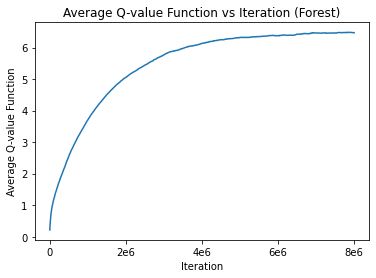

In [105]:
v = [s['Mean V'] for s in stats]
plt.plot(range(1, 10000001, 1000), v)
plt.xticks(range(1, 10000002, 2500000), ['0', '2e6', '4e6', '6e6', '8e6'])
plt.ylabel('Average Q-value Function')
plt.xlabel('Iteration')
plt.title("Average Q-value Function vs Iteration (Forest)")

In [48]:
P, R = example.forest(S=20, p=0.1)

vi = mdp.ValueIteration(P, R, 0.95, epsilon=0.01)
stats = vi.run()
print('Value Iteratiion Policy:  ', vi.policy)

pi = mdp.PolicyIteration(P, R, 0.95, max_iter=10000)
stats = pi.run()
print('Policy Iteratiion Policy: ', pi.policy)

ql = mdp.QLearning(P, R, 0.95, n_iter=100000,)
stats = ql.run()
print('Q-Learning Policy:        ', ql.policy)


Value Iteratiion Policy:   (0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Policy Iteratiion Policy:  (0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Q-Learning Policy:         (0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0)


In [59]:
vi = mdp.ValueIteration(P, R, 0.95, epsilon=0.01)
stats = vi.run()
print('Value Iteratiion Policy (gamma=0.95):', vi.policy)
vi = mdp.ValueIteration(P, R, 0.9, epsilon=0.01)
stats = vi.run()
print('Value Iteratiion Policy (gamma=0.9): ', vi.policy)
vi = mdp.ValueIteration(P, R, 0.8, epsilon=0.01)
stats = vi.run()
print('Value Iteratiion Policy (gamma=0.8): ', vi.policy)
vi = mdp.ValueIteration(P, R, 0.7, epsilon=0.01)
stats = vi.run()
print('Value Iteratiion Policy (gamma=0.7): ', vi.policy)
vi = mdp.ValueIteration(P, R, 0.6, epsilon=0.01)
stats = vi.run()
print('Value Iteratiion Policy (gamma=0.6): ', vi.policy)


Value Iteratiion Policy (gamma=0.95): (0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Value Iteratiion Policy (gamma=0.9):  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Value Iteratiion Policy (gamma=0.8):  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0)
Value Iteratiion Policy (gamma=0.7):  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0)
Value Iteratiion Policy (gamma=0.6):  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0)


In [60]:
pi = mdp.PolicyIteration(P, R, 0.95, max_iter=10000)
stats = pi.run()
print('Policy Iteratiion Policy (gamma=0.95):', pi.policy)
pi = mdp.PolicyIteration(P, R, 0.9, max_iter=10000)
stats = pi.run()
print('Policy Iteratiion Policy (gamma=0.9): ', pi.policy)
pi = mdp.PolicyIteration(P, R, 0.8, max_iter=10000)
stats = pi.run()
print('Policy Iteratiion Policy (gamma=0.8): ', pi.policy)
pi = mdp.PolicyIteration(P, R, 0.7, max_iter=10000)
stats = pi.run()
print('Policy Iteratiion Policy (gamma=0.7): ', pi.policy)
pi = mdp.PolicyIteration(P, R, 0.6, max_iter=10000)
stats = pi.run()
print('Policy Iteratiion Policy (gamma=0.6): ', pi.policy)


Policy Iteratiion Policy (gamma=0.95): (0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Policy Iteratiion Policy (gamma=0.9):  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Policy Iteratiion Policy (gamma=0.8):  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0)
Policy Iteratiion Policy (gamma=0.7):  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0)
Policy Iteratiion Policy (gamma=0.6):  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0)
